# Create templates for functions

The easiest way to achieve this is using `decorators`. They are just functions with a special behaviour, they wrap other functions into a more complex structure. For example, suppose you want calculate the time used to run some functions but you don't want to write

    begin = time.time()
    function(...)
    end = time.time()
    print('Total time: {}s'.format(end - begin))

What you can do is create a function called... `timer` with the following structure.

In [1]:
import time

def timer(f):
    def template(*args, **kwargs):
        begin = time.time()
        f(*args, **kwargs)
        end = time.time()
        print('Total time: {}s'.format(end - begin))
    return template

Now you can easily extend any function with the timer struct using the function `with_timer` as a decorator `@`.

In [2]:
@timer
def delay(t):
    time.sleep(t)

delay(5)

Total time: 5.00448203086853s


You can also add pass parameters to your decorator. For example, let's suppose you want to add a Gaussian noise to the functions in you simulation but you don't want to pass the parameters of the Gaussian as parameters in your function. So you could create a function called `gaussian_noise` in the follow way.

In [3]:
import numpy as np

def gaussian_noise(*args, **kwargs):
    mean = kwargs.get('mean', 0.0)
    sd = kwargs.get('sd', 1.0)
    def decorator(f):
        def template(*args2, **kwargs2):
            return f(*args2, **kwargs2) + np.random.normal(mean, sd)
        return template
    return decorator

Essentially the `decorator` function is the "real decorator" (compare it to the previous example) and the `gaussian_noise` is a function that takes the parameters and passes them to the decorator.

In [4]:
@gaussian_noise(sd=0.5)
def noise_sin(n):
    return np.sin(n)

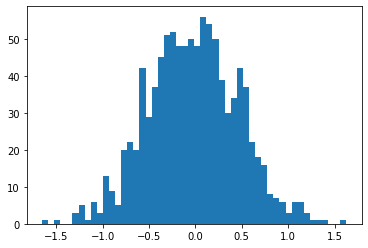

In [5]:
import matplotlib.pyplot as plt

_ = plt.hist([noise_sin(0) for _ in range(1000)], bins=50)